In [1]:
import numpy as np
import pandas as pd
import nltk     #natural language tool kit


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('rdany_conversations_2016-03-01.csv')

In [4]:
df.head()

,source,text,date,hashed_message_id,hashed_chat_id
0,human,[START],0,fce1649c457fcd02600f0f1aece46c1a88d3258fdfc2d8...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...
1,robot,"Hi there, how are you!? 😁😁",23789,8601139615d43330986f3f27b78bcf0212d2a4f1e4a4d7...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...
2,human,"Oh, thanks! I'm fine. This is an evening in my...",41177,a2eb7031aa536c89231517fc71ea3315c89ca50fef155b...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...
3,robot,😄 here is afternoon!,41598,e0ac851c9ff34cd39a7e490fb9021163b8be6df097737f...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...
4,human,How do you feel today? Tell me something about...,41629,0d2937ef1d5e806d46b78f2264bee44f9cbad0d68e4ce2...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...


In [10]:
df['textlen']=df['text'].apply(len)

In [17]:
df.head(2)

,source,text,date,hashed_message_id,hashed_chat_id,textlen
0,human,[START],0,fce1649c457fcd02600f0f1aece46c1a88d3258fdfc2d8...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,7
1,robot,"Hi there, how are you!? 😁😁",23789,8601139615d43330986f3f27b78bcf0212d2a4f1e4a4d7...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,32


In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    nopunc=[char for char in mess if char not in string.punctuation ]
    return(''.join(nopunc))
    

In [18]:
df['text']=df['text'].apply(text_process)

In [19]:
df.head(2)

,source,text,date,hashed_message_id,hashed_chat_id,textlen
0,human,START,0,fce1649c457fcd02600f0f1aece46c1a88d3258fdfc2d8...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,7
1,robot,Hi there how are you 😁😁,23789,8601139615d43330986f3f27b78bcf0212d2a4f1e4a4d7...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,32


In [20]:
for i in range(3):
    print(df['text'][i])

START
Hi there how are you 😁😁
Oh thanks Im fine This is an evening in my timezone


In [21]:
df['len']=df['text'].apply(lambda x: len(x.split()))

In [22]:
df.head(2)

,source,text,date,hashed_message_id,hashed_chat_id,textlen,len
0,human,START,0,fce1649c457fcd02600f0f1aece46c1a88d3258fdfc2d8...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,7,1
1,robot,Hi there how are you 😁😁,23789,8601139615d43330986f3f27b78bcf0212d2a4f1e4a4d7...,b71a7a6e3eae414113fd7c6d3fc3e13b50fd5fbf335b95...,32,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0B9BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E581E48>], dtype=object)

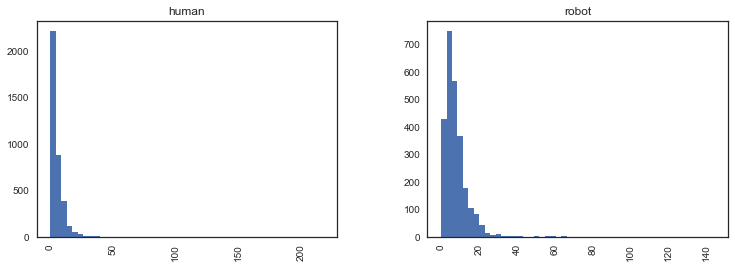

In [24]:
df.hist(column='len',by='source',bins=50,figsize=(12,4))

In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
train, test=train_test_split(df,test_size=0.3)

In [27]:
## Create tfidf variables
train_corpus = []
test_corpus = []
for each in train['text']:
    train_corpus.append(each)
for each in test['text']:
    test_corpus.append(each)
## Start creating them
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()
train_features= v.fit_transform(train_corpus)
test_features = v.transform(test_corpus)

In [28]:
print(train_features.shape)
print(test_features.shape)

(4427, 4187)
(1898, 4187)


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
Classifiers = { 'dt':DecisionTreeClassifier(random_state=42, min_samples_leaf=1),'rf':RandomForestClassifier(random_state=42, n_estimators=100,n_jobs=-1)}
 

In [43]:
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(train_features,train['source'])
    pred = clf.predict(test_features)
    Accuracy = accuracy_score(test['source'],pred)
    Confusion_matrix = confusion_matrix(test['source'],pred)
    print('==='*35)
    print('Accuracy of '+ clf_name +' is '+str(Accuracy))
    print('==='*35)
    print(Confusion_matrix)

In [44]:
ML_Pipeline('dt')

Accuracy of dt is 0.699157007376
[[894 191]
 [380 433]]


In [45]:
ML_Pipeline('rf')

Accuracy of rf is 0.730769230769
[[928 157]
 [354 459]]
